# Diamonds Analysis

In [1]:
# loading the libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [25]:
# reading dataset from web into R
url <- "https://raw.githubusercontent.com/cpan0/project_proposal/main/diamonds.csv"
diamonds <- read_csv(url)
diamonds <- diamonds %>% 
    select(carat, cut, color, clarity, price)   # selecting the necessary variables/columns
head(diamonds)

Parsed with column specification:
cols(
  carat = col_double(),
  cut = col_character(),
  color = col_character(),
  clarity = col_character(),
  depth = col_double(),
  table = col_double(),
  x = col_double(),
  y = col_double(),
  z = col_double(),
  price = col_double()
)



carat,cut,color,clarity,price
<dbl>,<chr>,<chr>,<chr>,<dbl>
0.23,Ideal,E,SI2,326
0.21,Premium,E,SI1,326
0.23,Good,E,VS1,327
0.29,Premium,I,VS2,334
0.31,Good,J,SI2,335
0.24,Very Good,J,VVS2,336


In [27]:
# splitting the dataset into training (75%) and testing (25%) datasets based on cut
diamonds_split <- initial_split(diamonds, prop = 0.75, strata = cut)
diamonds_train <- training(diamonds_split)
diamonds_test <- testing(diamonds_split) 

glimpse(diamonds_train)
glimpse(diamonds_test)

Rows: 40,456
Columns: 5
$ carat   <dbl> 0.23, 0.21, 0.23, 0.29, 0.31, 0.24, 0.24, 0.26, 0.23, 0.30, 0…
$ cut     <chr> "Ideal", "Premium", "Good", "Premium", "Good", "Very Good", "…
$ color   <chr> "E", "E", "E", "I", "J", "J", "I", "H", "H", "J", "F", "E", "…
$ clarity <chr> "SI2", "SI1", "VS1", "VS2", "SI2", "VVS2", "VVS1", "SI1", "VS…
$ price   <dbl> 326, 326, 327, 334, 335, 336, 336, 337, 338, 339, 342, 345, 3…
Rows: 13,484
Columns: 5
$ carat   <dbl> 0.22, 0.23, 0.31, 0.30, 0.23, 0.23, 0.23, 0.33, 0.26, 0.32, 0…
$ cut     <chr> "Fair", "Ideal", "Ideal", "Ideal", "Very Good", "Very Good", …
$ color   <chr> "E", "J", "J", "I", "H", "D", "E", "J", "D", "H", "F", "H", "…
$ clarity <chr> "VS2", "VS1", "SI2", "SI2", "VS1", "VS2", "VS1", "SI1", "VS1"…
$ price   <dbl> 337, 340, 344, 348, 353, 357, 402, 403, 403, 403, 403, 403, 4…


In [28]:
# exploratory data analysis (summary)
diamonds_carat_min_max <- diamonds_train %>% 
    summarize(min_carat = min(carat),
             max_carat = max(carat))
diamonds_carat

diamonds_cut_n <- diamonds_train %>% 
    group_by(cut) %>% 
    summarize(n = n())
diamonds_cut

diamonds_clarity_n <- diamonds_train %>% 
    group_by(clarity) %>% 
    summarize(n = n())
diamonds_clarity

diamonds_color_n <- diamonds_train %>% 
    group_by(color) %>% 
    summarize(n = n())
diamonds_color

diamonds_price_min_max <- diamonds_train %>% 
    summarize(min_price = min(price),
             max_price = max(price))
diamonds_price

min_carat,max_carat
<dbl>,<dbl>
0.2,5.01


`summarise()` ungrouping output (override with `.groups` argument)



cut,n
<chr>,<int>
Fair,1192
Good,3666
Ideal,16191
Premium,10342
Very Good,9065


`summarise()` ungrouping output (override with `.groups` argument)



clarity,n
<chr>,<int>
I1,563
IF,1331
SI1,9744
SI2,6909
VS1,6124
VS2,9189
VVS1,2762
VVS2,3834


`summarise()` ungrouping output (override with `.groups` argument)



color,n
<chr>,<int>
D,5070
E,7341
F,7246
G,8420
H,6222
I,4080
J,2077


min_price,max_price
<dbl>,<dbl>
326,18823


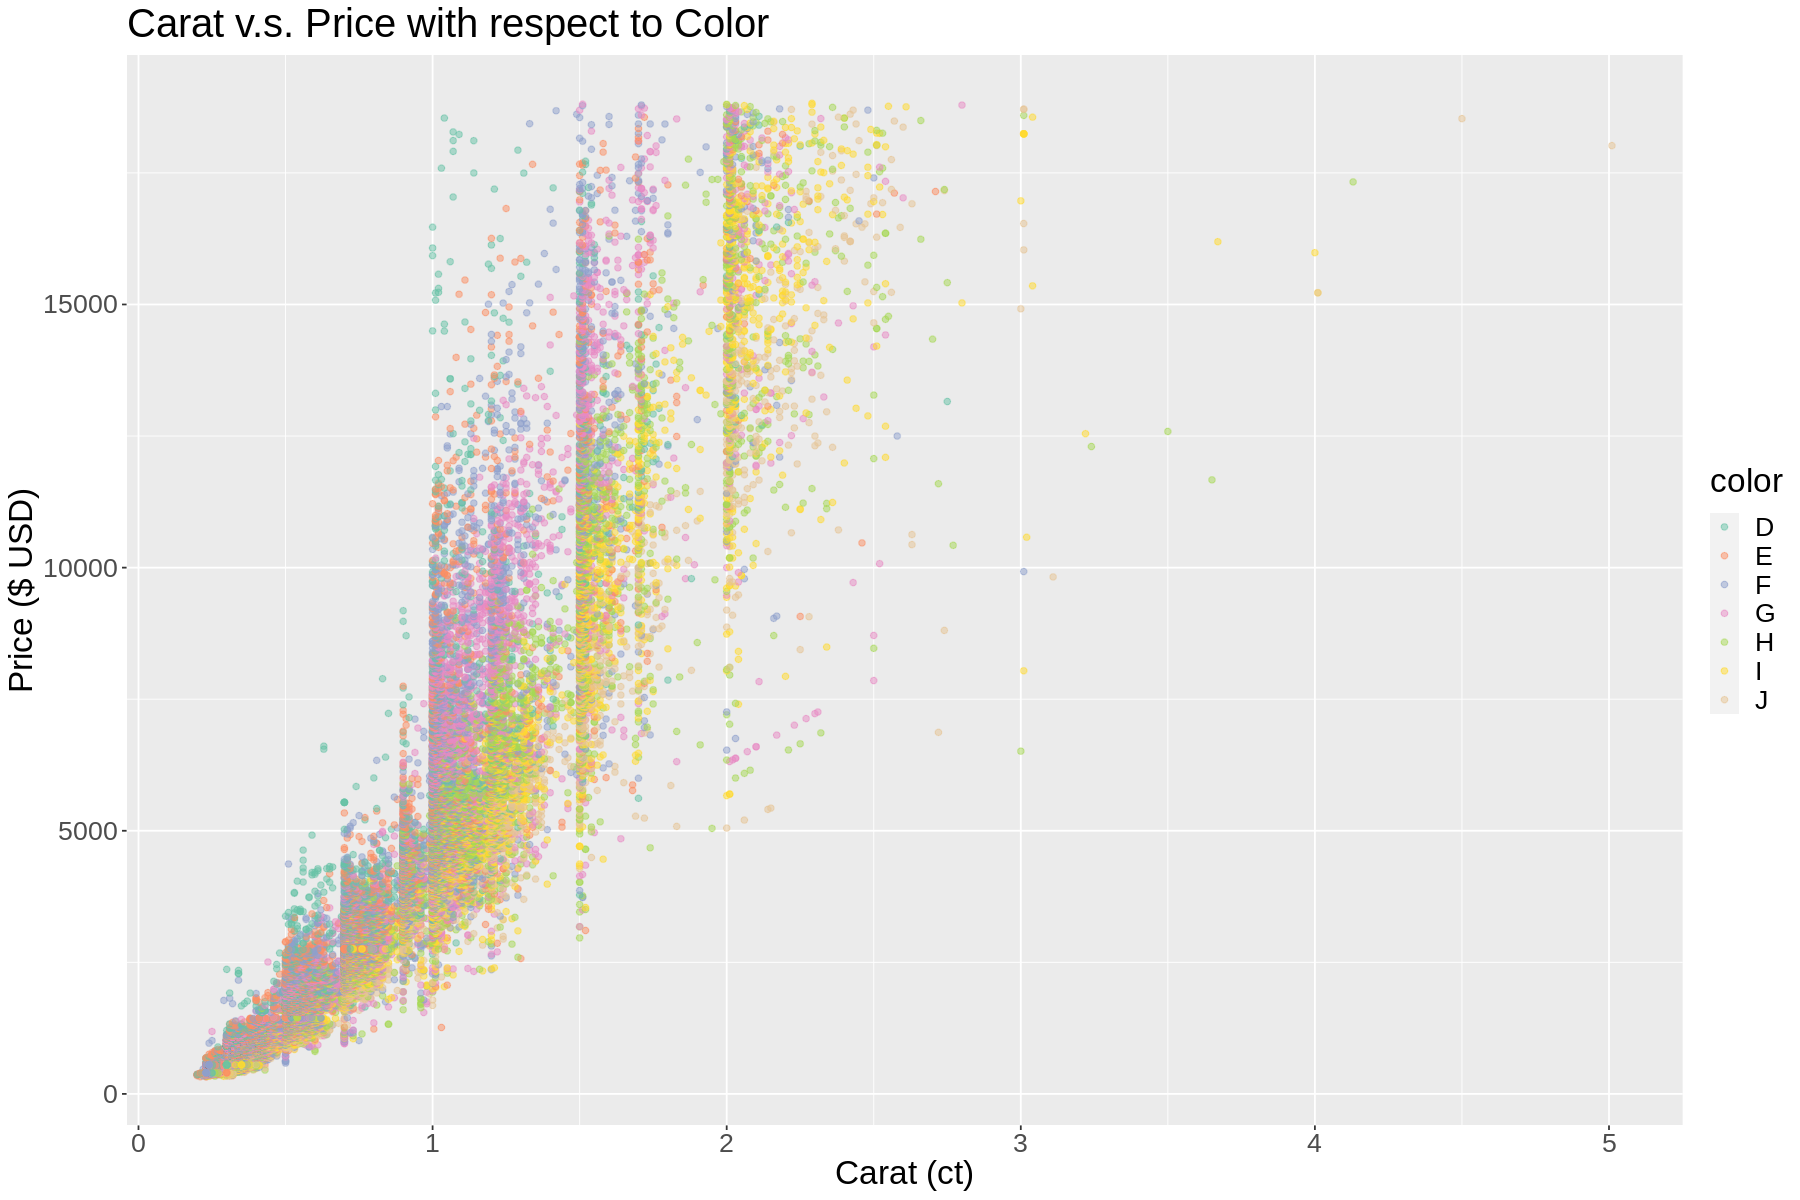

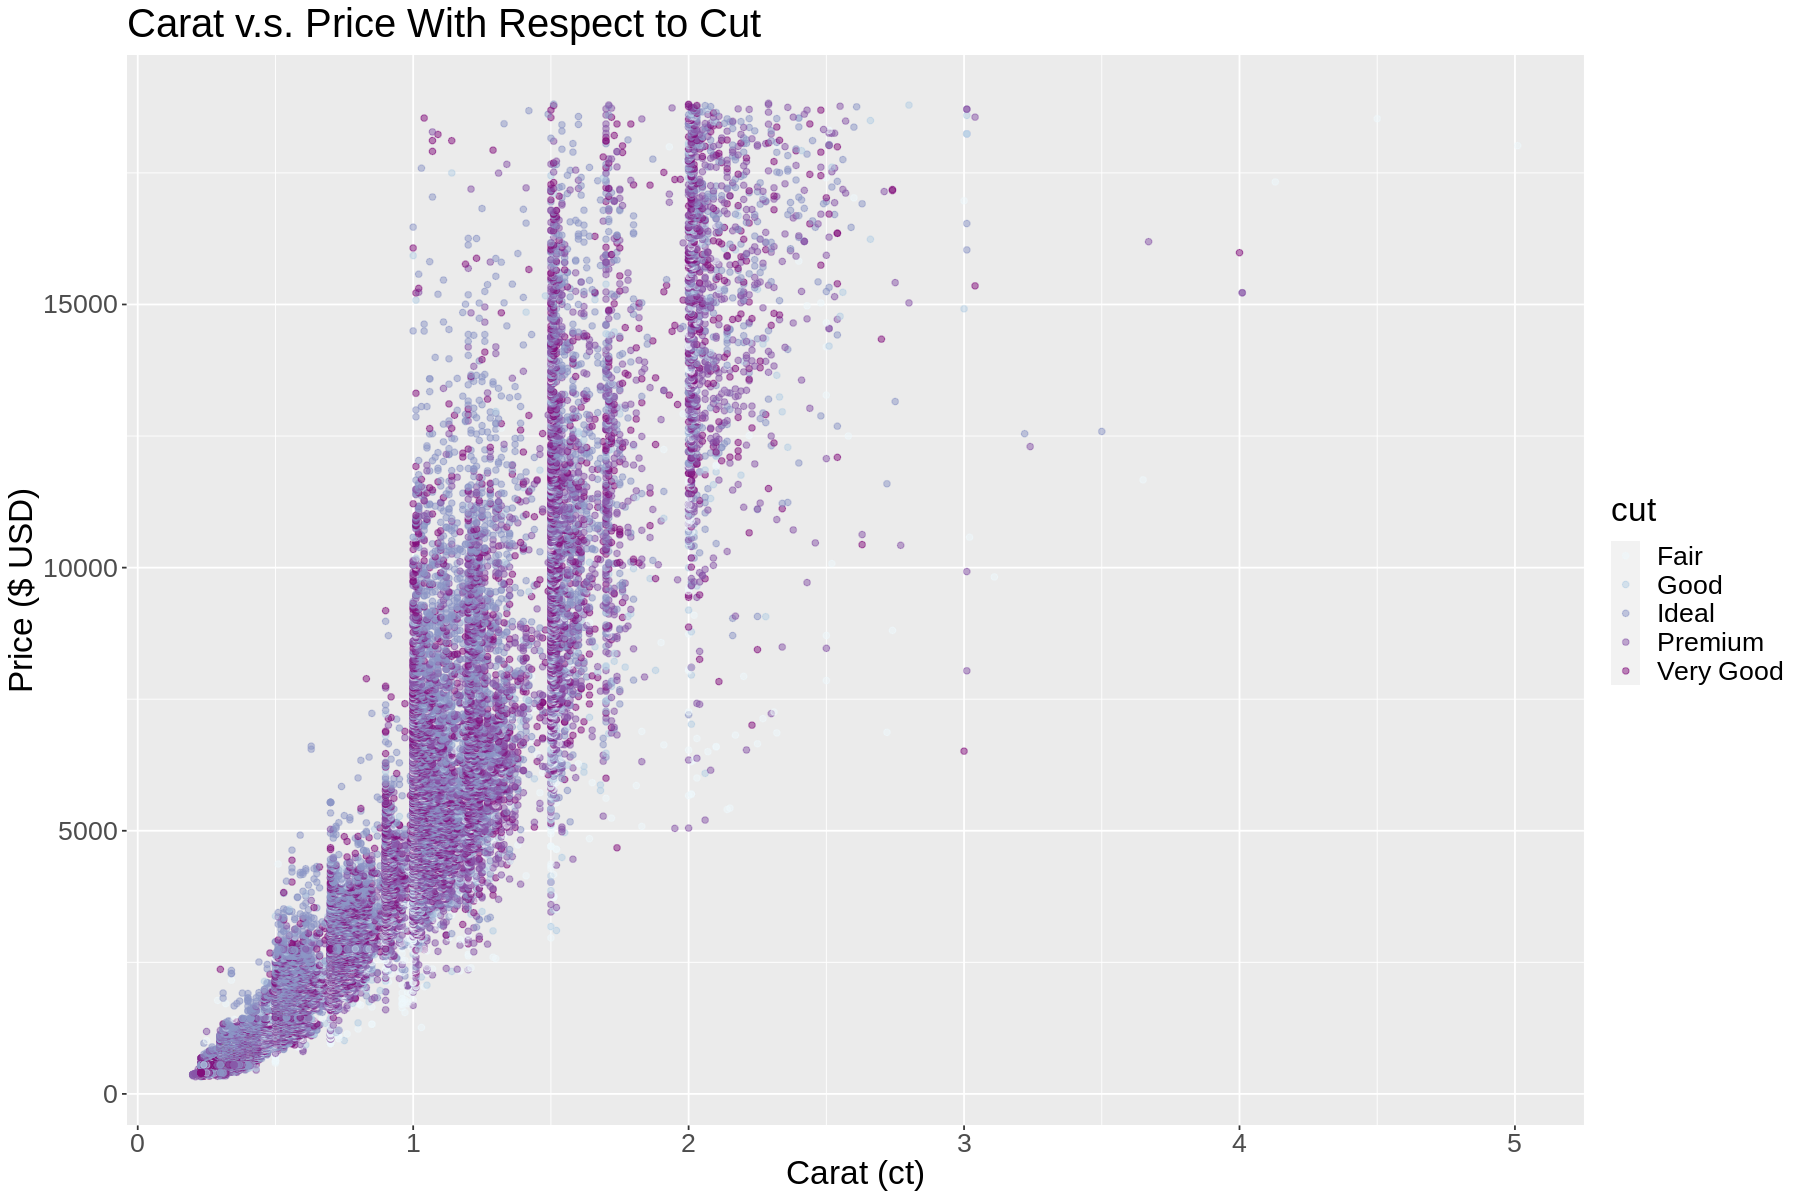

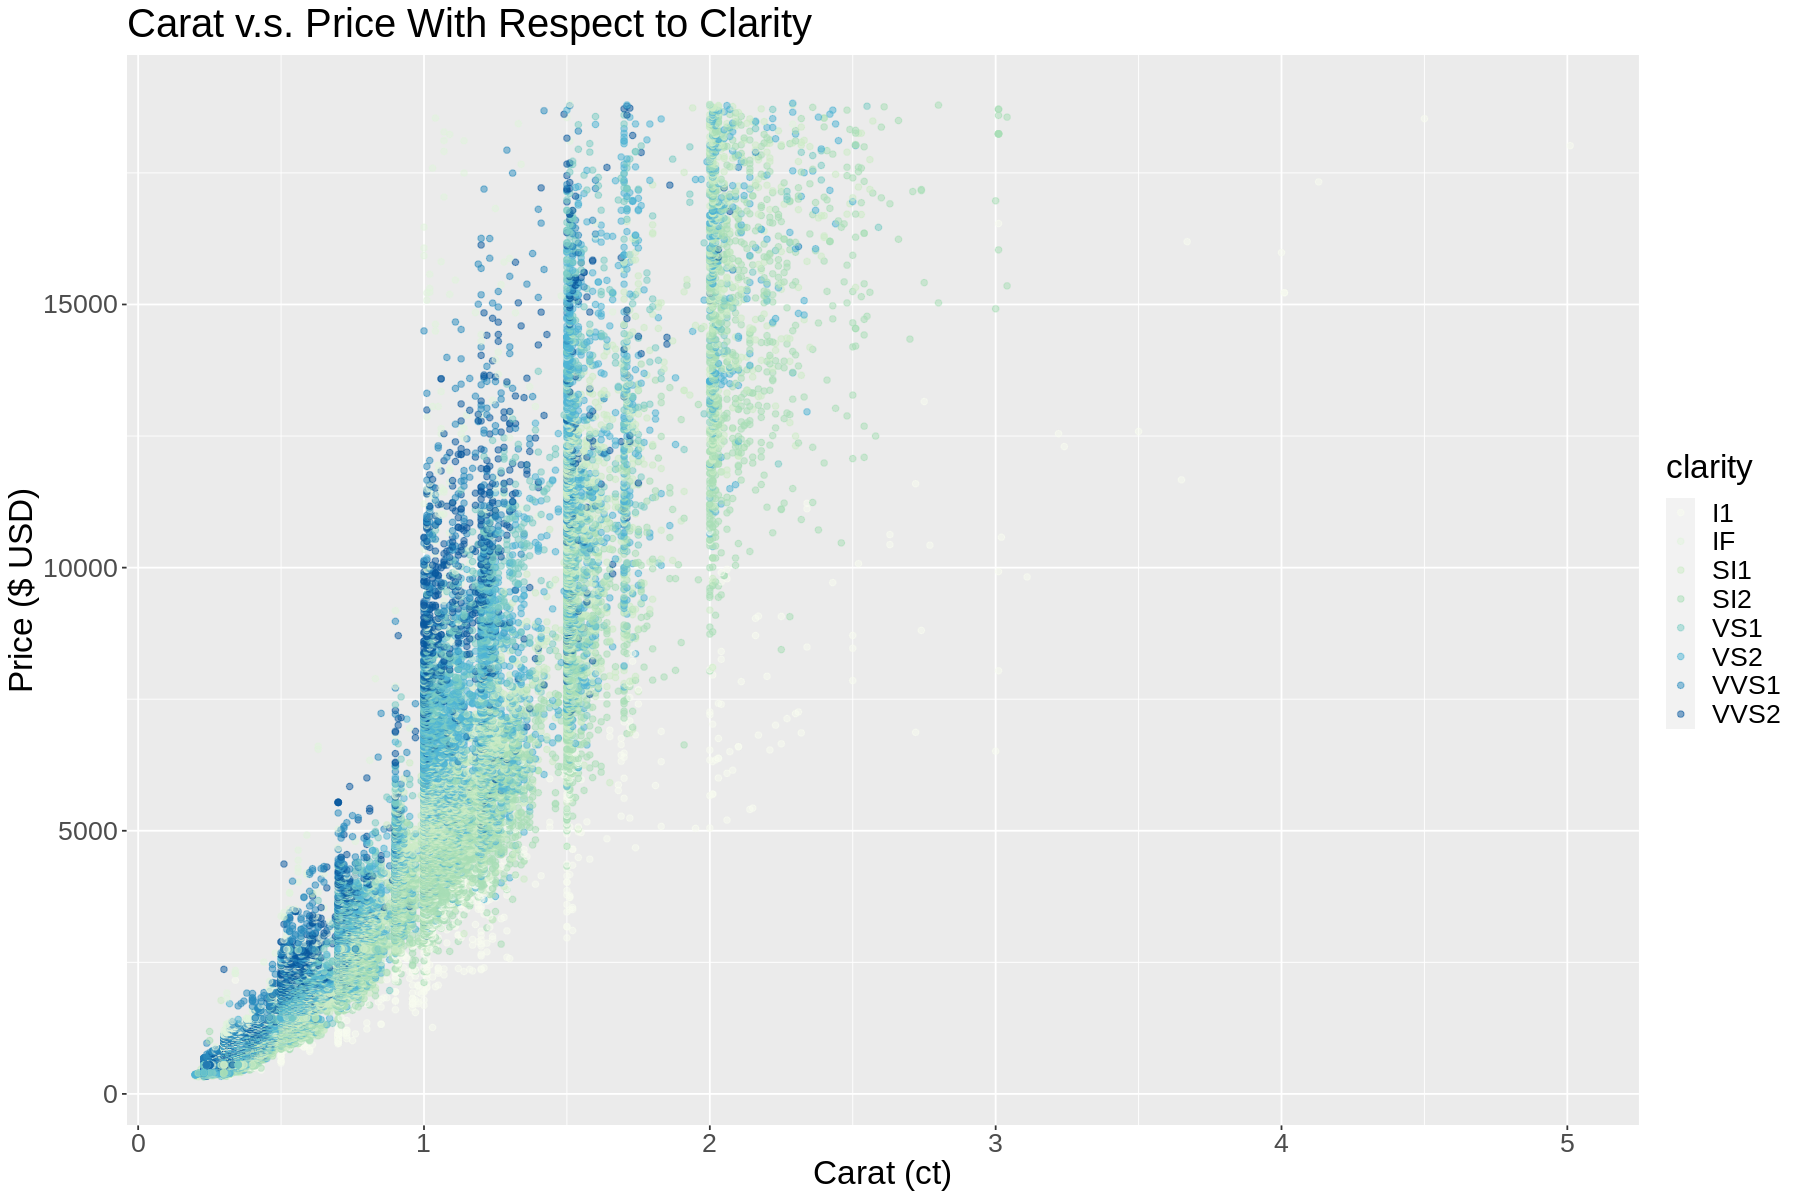

In [29]:
options(repr.plot.width = 15, repr.plot.height = 10)

# exploratory data analysis (visualization)
diamonds_color_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = color)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price with respect to Color", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "Set2")
diamonds_color_plot

diamonds_cut_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = cut)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price With Respect to Cut", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "BuPu")
diamonds_cut_plot

diamonds_clarity_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price, color = clarity)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price With Respect to Clarity", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    scale_color_brewer(palette = "GnBu")
diamonds_clarity_plot

# display.brewer.all(colorblindFriendly = T)
# display.brewer.all()

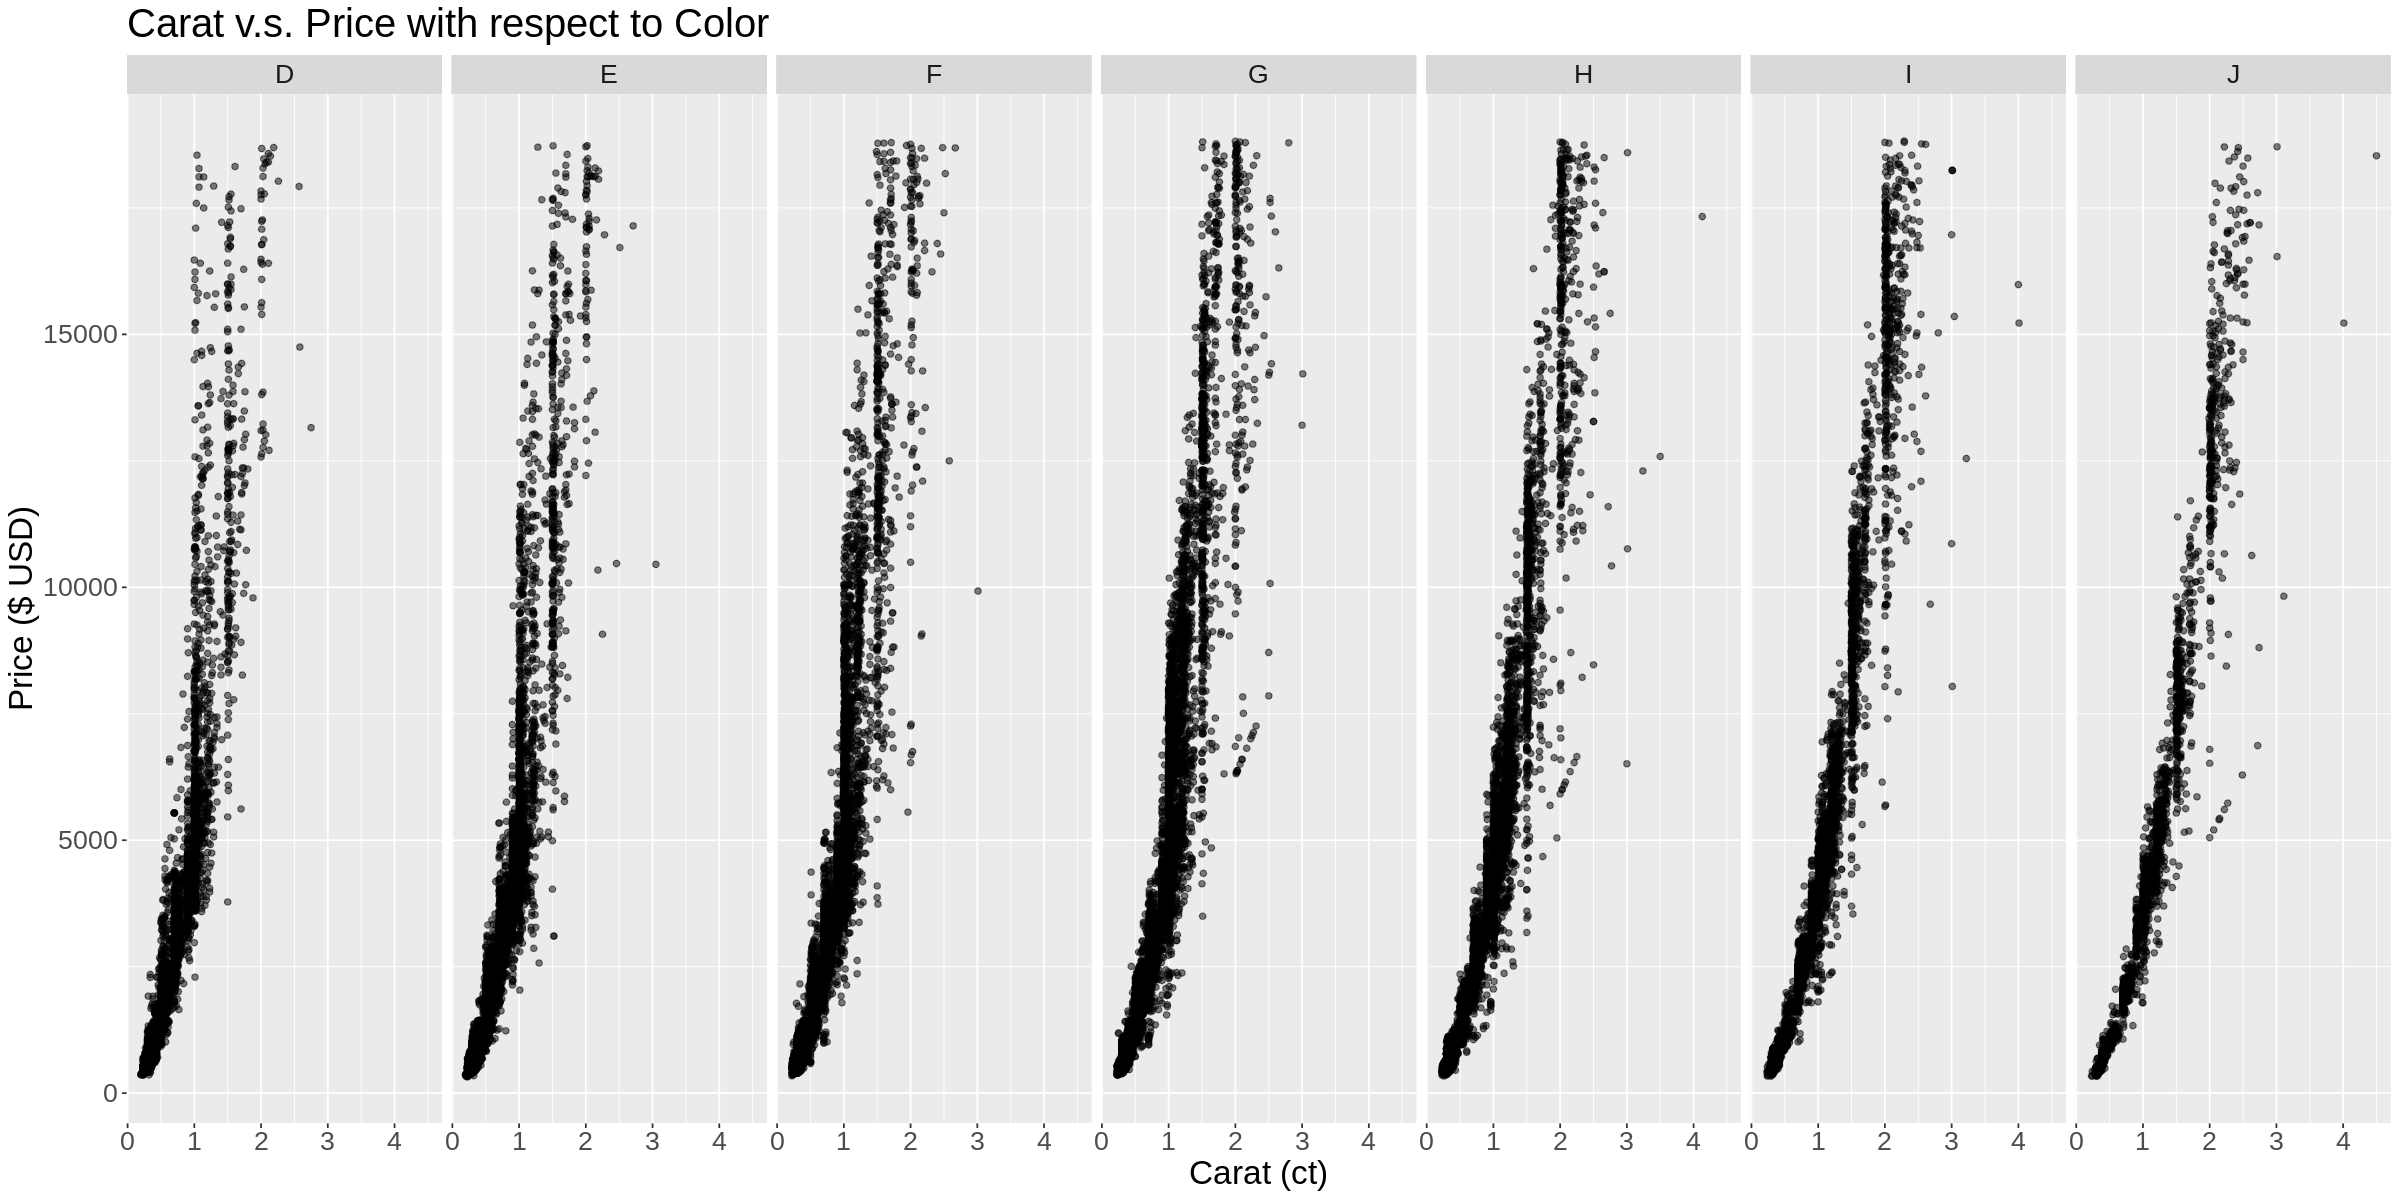

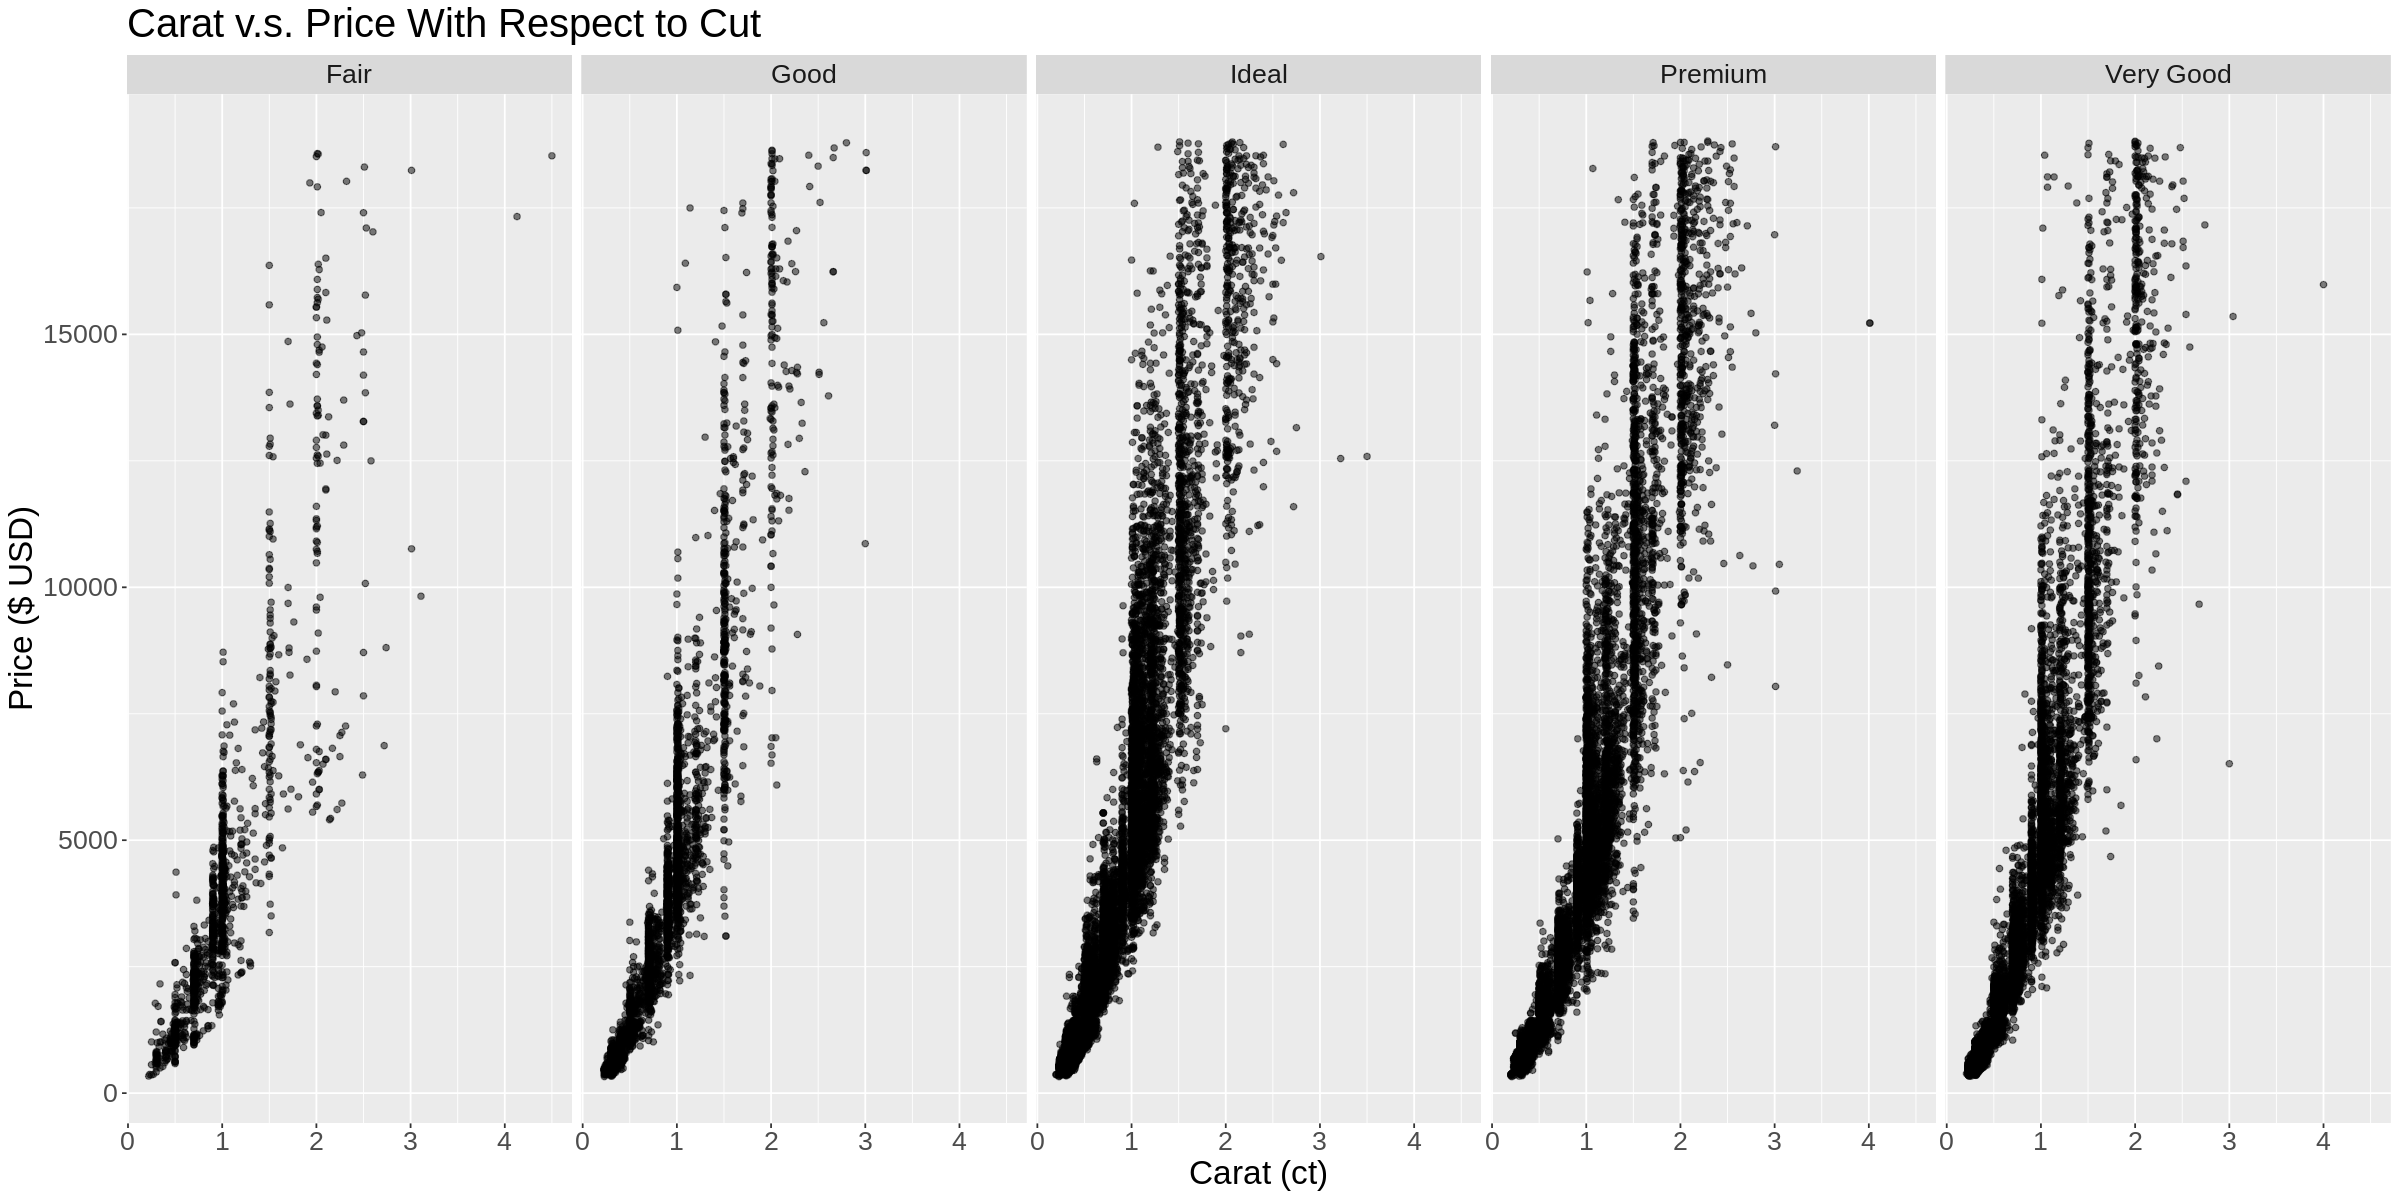

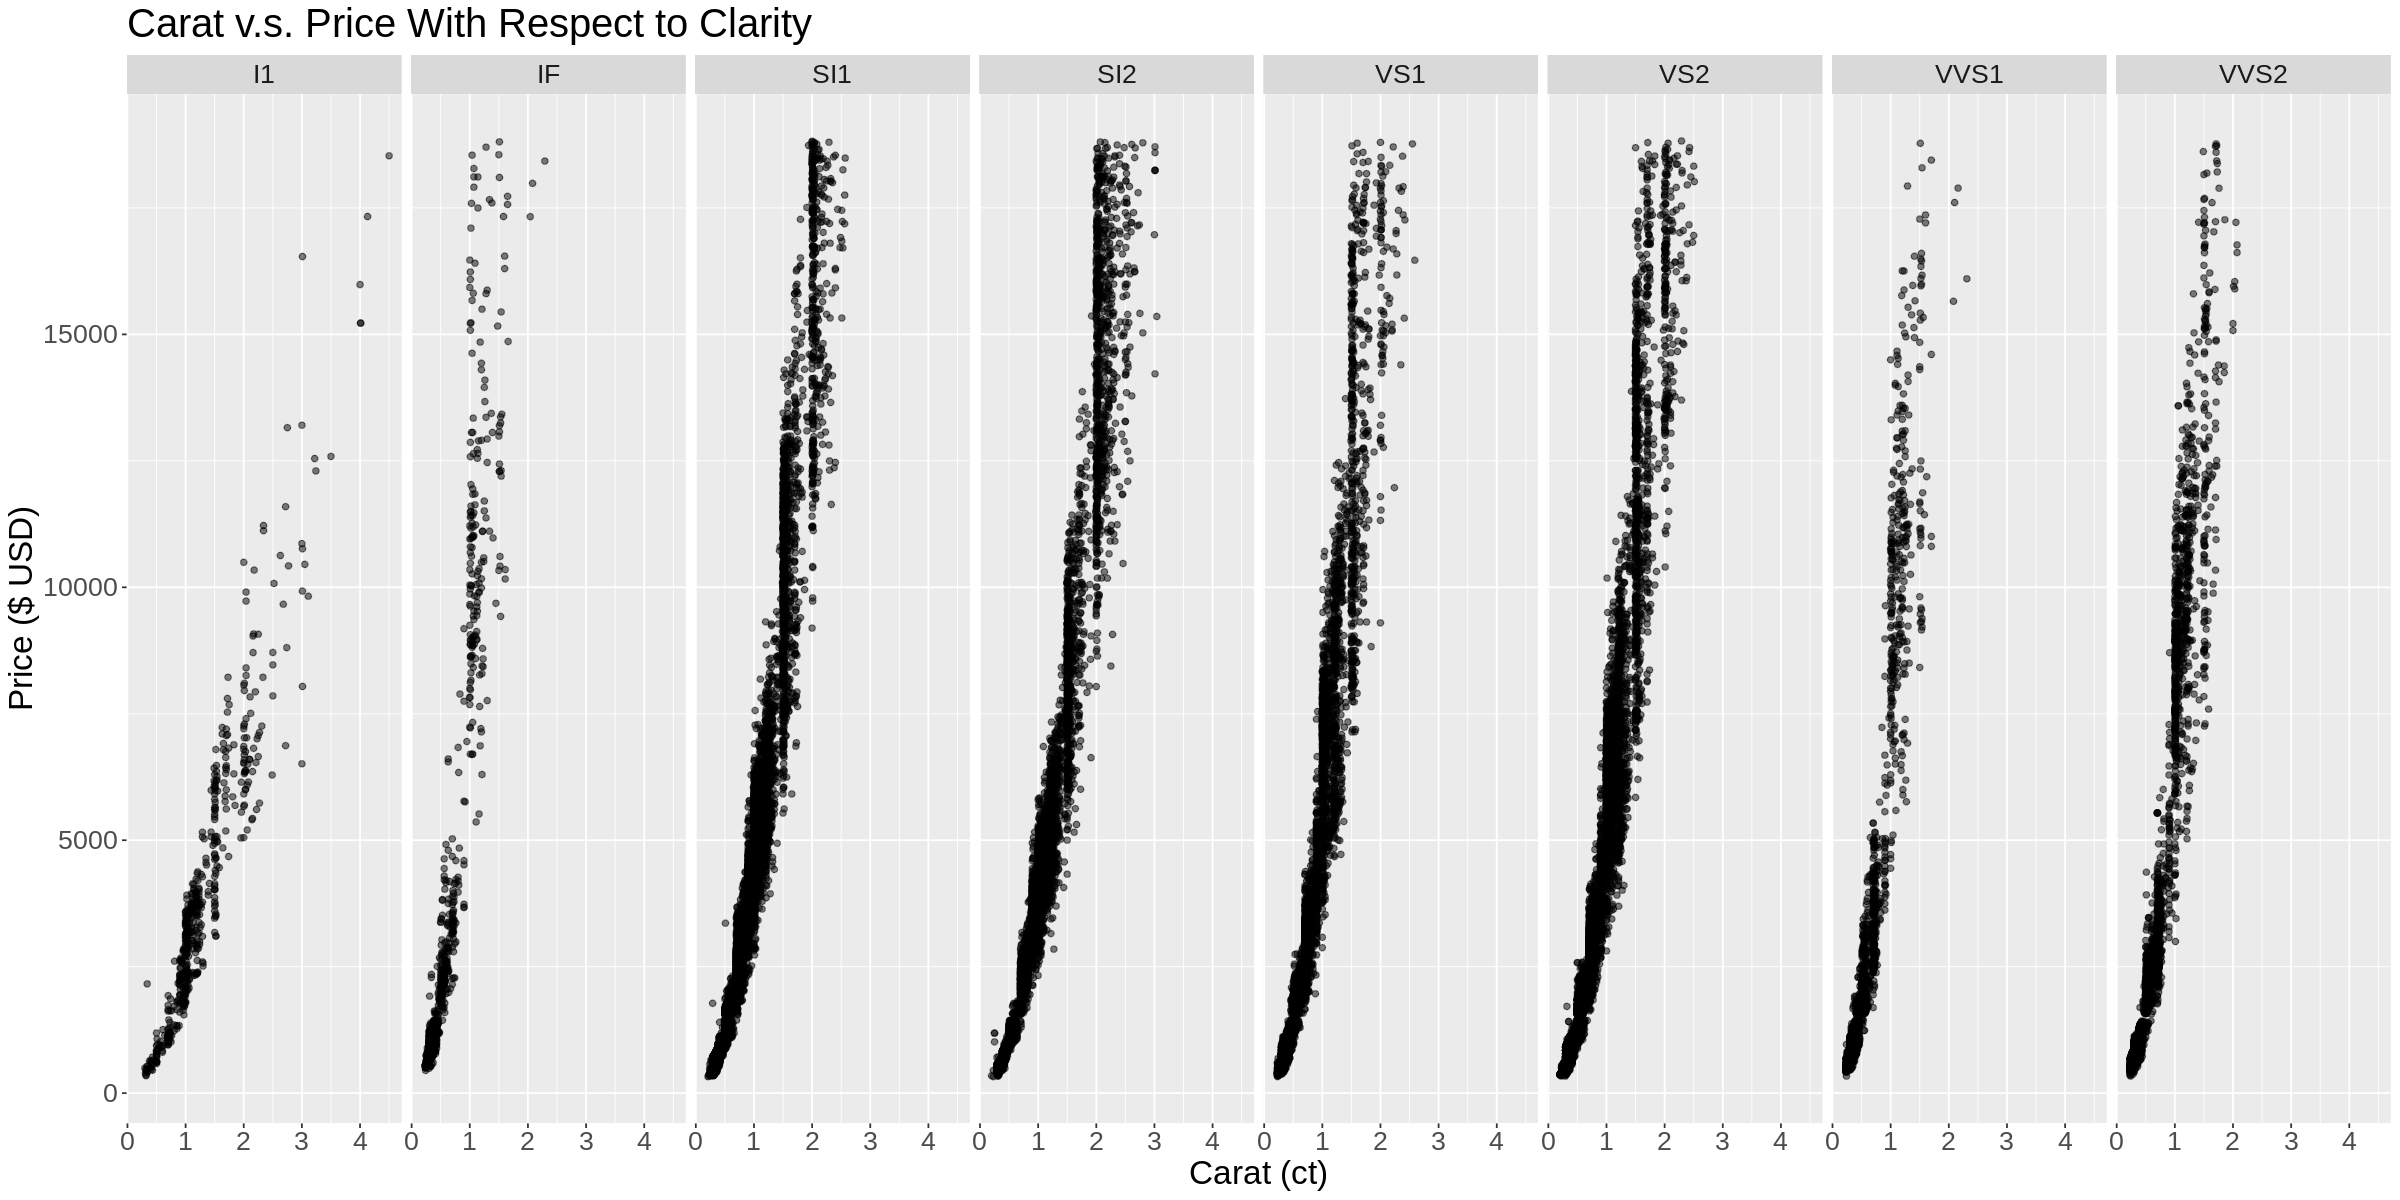

In [16]:
# another way of visualizing (talk with group)

options(repr.plot.width = 15, repr.plot.height = 10)
diamonds_color_side_by_side_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price with respect to Color", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    facet_grid(. ~ color)
diamonds_color_side_by_side_plot

diamonds_cut_side_by_side_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price With Respect to Cut", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    facet_grid(. ~ cut)
diamonds_cut_side_by_side_plot

diamonds_clarity_side_by_side_plot <- diamonds_train %>% 
    ggplot(aes(x = carat, y = price)) +
    geom_point(alpha = 0.5) +
    labs(title = "Carat v.s. Price With Respect to Clarity", x = "Carat (ct)", y = "Price ($ USD)") +
    theme(text = element_text(size=20)) +
    facet_grid(. ~ clarity)
diamonds_clarity_side_by_side_plot